In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import os
import talib as tl
%matplotlib inline

In [2]:
aapl = pdr.get_data_google('AAPL', '2000-01-01', '2018-01-01')

In [3]:
close = aapl['Close'].values

---
# TA-Lib discovery

In [4]:
sma = tl.SMA(close, timeperiod=200)

In [5]:
aapl['SMA'] = sma

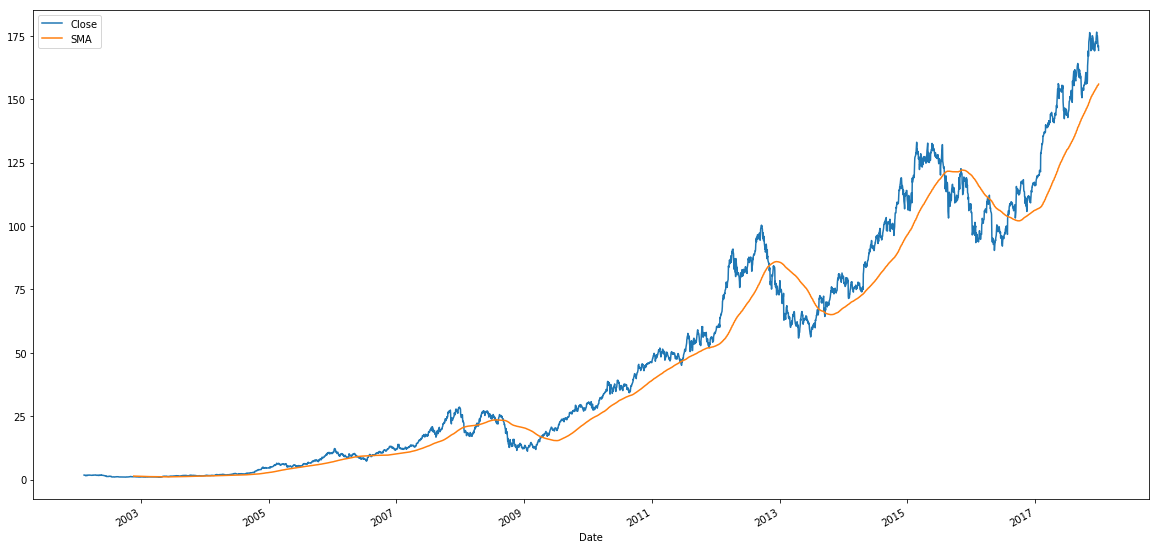

In [6]:
aapl[['Close', 'SMA']].plot(figsize=(20,10))

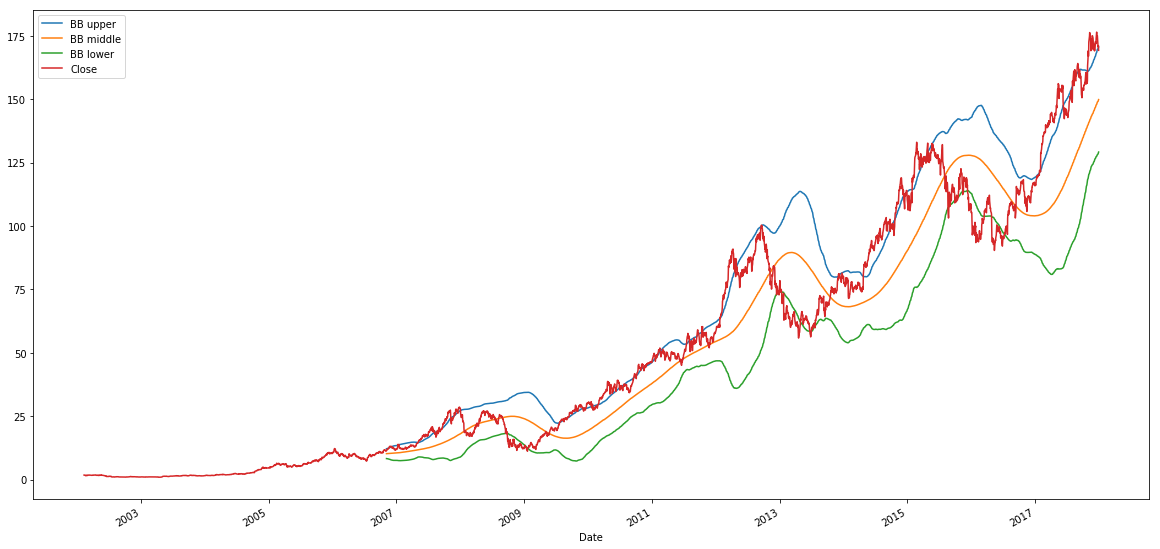

In [7]:
upper, middle, lower = tl.BBANDS(close, matype=tl.MA_Type.T3, timeperiod=200)
aapl['BB upper'] = upper
aapl['BB middle'] = middle
aapl['BB lower'] = lower

aapl[['BB upper', 'BB middle', 'BB lower', 'Close']].plot(figsize=(20,10))

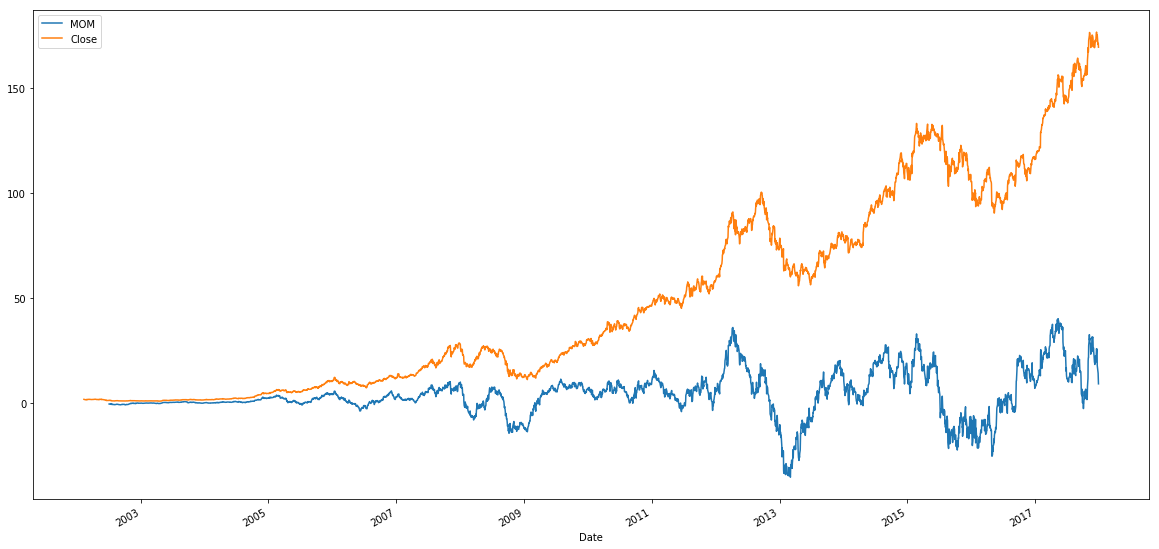

In [8]:
aapl['MOM'] = tl.MOM(close, timeperiod=100)
aapl[['MOM', 'Close']].plot(figsize=(20,10))

In [9]:
inputs = {
    'open': aapl['Open'].values.astype(np.float64),
    'high': aapl['High'].values.astype(np.float64),
    'low': aapl['Low'].values.astype(np.float64),
    'close': aapl['Close'].values.astype(np.float64),
#     'volume': aapl['Volume'].values.astype(np.float64)
}

In [10]:
aapl['Is DOJI'] = tl.CDLDOJI(**inputs)
print(aapl['Is DOJI'].value_counts())
aapl[aapl['Is DOJI'] > 0]

0      3454
100     546
Name: Is DOJI, dtype: int64


,Open,High,Low,Close,Volume,SMA,BB upper,BB middle,BB lower,MOM,Is DOJI
Date,,,,,,,,,,,
2002-03-08,1.77,1.79,1.74,1.76,66557400,NaN,NaN,NaN,NaN,NaN,100
2002-03-14,1.74,1.76,1.71,1.74,52991400,NaN,NaN,NaN,NaN,NaN,100
2002-03-28,1.69,1.71,1.68,1.69,25552800,NaN,NaN,NaN,NaN,NaN,100
2002-04-12,1.79,1.80,1.76,1.79,78013600,NaN,NaN,NaN,NaN,NaN,100
2002-04-15,1.79,1.80,1.77,1.79,73782800,NaN,NaN,NaN,NaN,NaN,100
2002-04-18,1.82,1.83,1.77,1.82,95893000,NaN,NaN,NaN,NaN,NaN,100
2002-05-03,1.68,1.72,1.67,1.68,55622000,NaN,NaN,NaN,NaN,NaN,100
2002-05-09,1.73,1.74,1.70,1.73,54107200,NaN,NaN,NaN,NaN,NaN,100
2002-05-15,1.81,1.86,1.77,1.81,83270600,NaN,NaN,NaN,NaN,NaN,100
